In [2]:
import gensim
import multiprocessing
import logging
import pandas as pd
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


cores = multiprocessing.cpu_count()
assert gensim.models.doc2vec.FAST_VERSION > -1

In [3]:
data = pd.read_csv('../data/final/plenos-xiv-tokens.csv')
data = data.loc[(data['political_group'].notnull())].reset_index(drop=True)

In [4]:
data.head()

,Unnamed: 0,legislatura,fecha,objeto_iniciativa,numero_expediente,autores,nombre_sesion,orador,enlace_pdf,text,political_group,cleaned_text
0,0,XIV,2020-01-04,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,S.M. El Rey Don Felipe VI,Pleno,"Borràs Castanyer, Laura (GPlu)",https://www.congreso.es:443/public_oficiales/L...,"Presidenta, señorías, empieza el año y volvemo...",GPlu,"['empieza', 'año', 'volvemos', 'debate', 'inve..."
1,1,XIV,2020-01-04,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,S.M. El Rey Don Felipe VI,Pleno,"Baldoví Roda, Joan (GPlu)",https://www.congreso.es:443/public_oficiales/L...,"Moltes gràcies, senyora presidenta. Hay alguno...",GPlu,"['moltes', 'gràcies', 'senyora', 'encanta', 'o..."
2,2,XIV,2020-01-04,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,S.M. El Rey Don Felipe VI,Pleno,"Quevedo Iturbe, Pedro (GPlu)",https://www.congreso.es:443/public_oficiales/L...,"Señora presidenta, señorías, señor candidato a...",GPlu,"['candidato', 'presidencia', 'buenas', 'tardes..."
3,3,XIV,2020-01-04,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,S.M. El Rey Don Felipe VI,Pleno,"Oramas González-Moro, Ana María (GPlu)",https://www.congreso.es:443/public_oficiales/L...,"Gracias, señora presidenta. Señorías, como dij...",GPlu,"['dijo', 'neruda', 'podría', 'escribir', 'vers..."
4,4,XIV,2020-01-04,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,S.M. El Rey Don Felipe VI,Pleno,"Sabanés Nadal, Inés (GPlu)",https://www.congreso.es:443/public_oficiales/L...,"Gracias, presidenta. Señorías, a pesar de la e...",GPlu,"['pesar', 'exageración', 'pesar', 'sobreactuac..."


In [35]:
groups = ['GS', 'GP', 'GVOX', 'GCUP-EC-GC', 'GR', 'GCs',
          'GV (EAJ-PNV)', 'GEH Bildu']

data = data[data['political_group'].isin(groups)].reset_index(drop=True)


In [36]:
#df = pd.DataFrame(data.groupby(['orador'], as_index=False)['cleaned_text'].aggregate(sum)).dropna()
# Not grouping by speaker and just keeping several items with the same label.
df = data[['orador', 'cleaned_text']]
df.columns = ['orador', 'text']
df = df.loc[df['text'] != 0].reset_index(drop=True)

In [37]:
df.tail()

,orador,text
6696,"Lamuà Estañol, Marc (GS)","['moltes', 'gràcies', 'prometió', 'tribuna', '..."
6697,"Garcés Sanagustín, Mario (GP)","['muchas', 'verdad', 'leyendo', 'real', 'hecho..."
6698,"Díaz Gómez, Guillermo (GCs)","['traen', 'tarde', 'tarde', 'reformas', 'neces..."
6699,"Sagastizabal Unzetabarrenetxea, Idoia (GV (EAJ...","['eguerdi', 'encontramos', 'real', 'dos', 'par..."
6700,"Aizpurua Arzallus, Mertxe (GEH Bildu)","['arratsalde', 'buenas', 'tardes', 'iniciado',..."


In [38]:
print(data.loc[0]['text'])

Boa tarde, señorías; boa tarde, presidenta. Gracias. Empiezo por el final. Señores y señoras de la derecha, nos merecemos —no nosotros, mi grupo parlamentario o el Grupo Parlamentario Socialista, sino el conjunto de la sociedad democrática de este país— algo más que sus exabruptos, gritos, amenazas e insultos continuados. Acostúmbrense a la democracia porque ya llevamos más de cuarenta años en democracia, señores de la derecha. (Aplausos). Señor Casado, hablaba usted de una traición a España. La señora Arrimadas hablaba de una pesadilla de insomnio. Lo que es una traición a España son los años y años de cajas B del Partido Popular, los más de 800 imputados y los más de 80 000 millones de euros que nos ha costado su corrupción. (Aplausos). Sí, tengo que empezar con un llamado no solo a los votantes de izquierda, sino al conjunto de los demócratas. Ante el ilusionante desafío histórico pero también ante la ofensiva bárbara de la derecha, hago un llamado a la calma y a la mesura, pero tam

In [40]:
corpus = df.values.tolist()

In [41]:
corpus[0]

['Gómez-Reino Varela, Antonio (GCUP-EC-GC)',
 "['boa', 'tarde', 'boa', 'tarde', 'empiezo', 'final', 'derecha', 'merecemos', 'socialista', 'conjunto', 'sociedad', 'democrática', 'país', 'exabruptos', 'gritos', 'amenazas', 'insultos', 'continuados', 'acostúmbrense', 'democracia', 'llevamos', 'cuarenta', 'años', 'democracia', 'derecha', 'casado', 'hablaba', 'traición', 'españa', 'arrimadas', 'hablaba', 'pesadilla', 'insomnio', 'traición', 'españa', 'años', 'años', 'cajas', 'popular', 'imputados', 'millones', 'euros', 'costado', 'corrupción', 'empezar', 'llamado', 'votantes', 'izquierda', 'conjunto', 'demócratas', 'ilusionante', 'desafío', 'histórico', 'ofensiva', 'bárbara', 'derecha', 'hago', 'llamado', 'calma', 'mesura', 'firme', 'movilización', 'cívica', 'defender', 'democracia', 'legítimo', 'salir', 'pocos', 'días', 'sesión', 'investidura', 'segundo', 'lugar', 'galicia', 'común', 'decíamos', 'campaña', 'país', 'galicia', 'próximo', 'galicia', 'galicia', 'presente', 'programa', 'firmado

In [42]:
import gensim

def read_corpus(fname):
    for line in fname:
        yield gensim.models.doc2vec.TaggedDocument(line[1], [line[0]])

train_corpus = list(read_corpus(corpus))

In [69]:
model0 = gensim.models.doc2vec.Doc2Vec(dm=1, vector_size=20, window=10, min_count=5, workers=cores, epochs=20)

2023-03-06 18:12:59,776 : INFO : Doc2Vec lifecycle event {'params': 'Doc2Vec(dm/m,d20,n5,w10,mc5,s0.001,t8)', 'datetime': '2023-03-06T18:12:59.776803', 'gensim': '4.1.2', 'python': '3.8.13 (default, Mar 28 2022, 06:16:26) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}


In [70]:
model0.build_vocab(train_corpus)

2023-03-06 18:13:01,380 : INFO : collecting all words and their counts
2023-03-06 18:13:01,383 : WARNING : Each 'words' should be a list of words (usually unicode strings). First 'words' here is instead plain <class 'str'>.
2023-03-06 18:13:01,385 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2023-03-06 18:13:05,639 : INFO : collected 86 word types and 336 unique tags from a corpus of 6701 examples and 34838791 words
2023-03-06 18:13:05,640 : INFO : Creating a fresh vocabulary
2023-03-06 18:13:05,642 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=5 retains 66 unique words (76.74418604651163%% of original 86, drops 20)', 'datetime': '2023-03-06T18:13:05.642251', 'gensim': '4.1.2', 'python': '3.8.13 (default, Mar 28 2022, 06:16:26) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'prepare_vocab'}
2023-03-06 18:13:05,643 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=5 leaves 34838754 word corpus (99.

In [71]:
model0.train(train_corpus, total_examples=len(train_corpus), epochs=model0.epochs)

2023-03-06 18:13:05,845 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 8 workers on 66 vocabulary and 20 features, using sg=0 hs=0 sample=0.001 negative=5 window=10 shrink_windows=True', 'datetime': '2023-03-06T18:13:05.845527', 'gensim': '4.1.2', 'python': '3.8.13 (default, Mar 28 2022, 06:16:26) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'train'}
2023-03-06 18:13:06,855 : INFO : EPOCH 1 - PROGRESS: at 7.63% examples, 607931 words/s, in_qsize 15, out_qsize 0
2023-03-06 18:13:07,855 : INFO : EPOCH 1 - PROGRESS: at 21.46% examples, 719202 words/s, in_qsize 11, out_qsize 4
2023-03-06 18:13:08,857 : INFO : EPOCH 1 - PROGRESS: at 36.53% examples, 780427 words/s, in_qsize 15, out_qsize 0
2023-03-06 18:13:09,858 : INFO : EPOCH 1 - PROGRESS: at 52.60% examples, 807370 words/s, in_qsize 14, out_qsize 1
2023-03-06 18:13:10,858 : INFO : EPOCH 1 - PROGRESS: at 68.48% examples, 828372 words/s, in_qsize 15, out_qsize 0
2023-03-06 18:13:11,859 : INFO : E

In [73]:
model0.save('../models/deputy_lvl-dm-m-d20-n5-w10-mc5-s0.001-t8).mdl')


2023-03-06 18:15:30,545 : INFO : Doc2Vec lifecycle event {'fname_or_handle': '../models/deputy_lvl-dm-m-d20-n5-w10-mc5-s0.001-t8).mdl', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2023-03-06T18:15:30.545559', 'gensim': '4.1.2', 'python': '3.8.13 (default, Mar 28 2022, 06:16:26) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'saving'}
2023-03-06 18:15:30,547 : INFO : not storing attribute cum_table
2023-03-06 18:15:30,549 : INFO : saved ../models/deputy_lvl-dm-m-d20-n5-w10-mc5-s0.001-t8).mdl


In [74]:
from sklearn.manifold import TSNE
import numpy as np
from sklearn.decomposition import PCA

# Functions.
# PCA.
def reduce_dimension(model):
    speakers = model.dv.index_to_key
    S = len(speakers)
    M = model.vector_size
    z = np.zeros((S, M))

    for i in range(S):
        z[i,:] = model.dv[i]

    dr = PCA(n_components = 2)
    Z = dr.fit_transform(z)

    Z = pd.DataFrame(Z)
    Z.columns = ['dim1', 'dim2']
    Z['speaker'] = speakers

    return Z, dr

# T-SNE.
def rd_tsne(model):
    speakers = model0.dv.index_to_key
    S = len(speakers)
    M = model.vector_size
    z = np.zeros((S, M))

    for i in range(S):
        z[i, :] = model.dv[i]

    dr = TSNE(n_components=2)
    Z = dr.fit_transform(z)

    Z = pd.DataFrame(Z)
    Z.columns = ['dim1', 'dim2']
    Z['speaker'] = speakers

    return Z

# Get color.
def get_color(reduced):
    spk = reduced.speaker.tolist()
    col = []
    for i in range(len(spk)):
        if '(GVOX)' in spk[i]:
            # #82b431
            # rgba(130,180,49,255)
            col.append('#82b431')
        elif '(GS)' in spk[i]:
            # #c10200
            # rgba(193,2,0,255)
            col.append('#c10200')
        elif '(GCs)' in spk[i]:
            # #f87729
            # rgba(248,119,41,255)
            col.append('#f87729')
        elif '(GP)' in spk[i]:
            # #1eb3e6
            # rgba(30,179,230,255)
            col.append('#1eb3e6')
        elif '(GCUP-EC-GC)' in spk[i]:
            # #a245b2
            # rgba(162,69,178,255)
            col.append('#a245b2')
        elif '(GR)' in spk[i]:
            # #f99f00
            # rgba(249,159,0,255)
            col.append('#f99f00')
        elif '(GV (EAJ-PNV))' in spk[i]:
            # #008146
            # rgba(0,129,70,255)
            col.append('#008146')
        elif '(GEH Bildu)' in spk[i]:
            # #bbce00
            # rgba(187,206,0,255)
            col.append('#bbce00')
        else:
            col.append('#000000')

    reduced['col'] = col
    return reduced


In [75]:
reduced, dr = reduce_dimension(model0)

In [76]:
reduced = get_color(reduced)

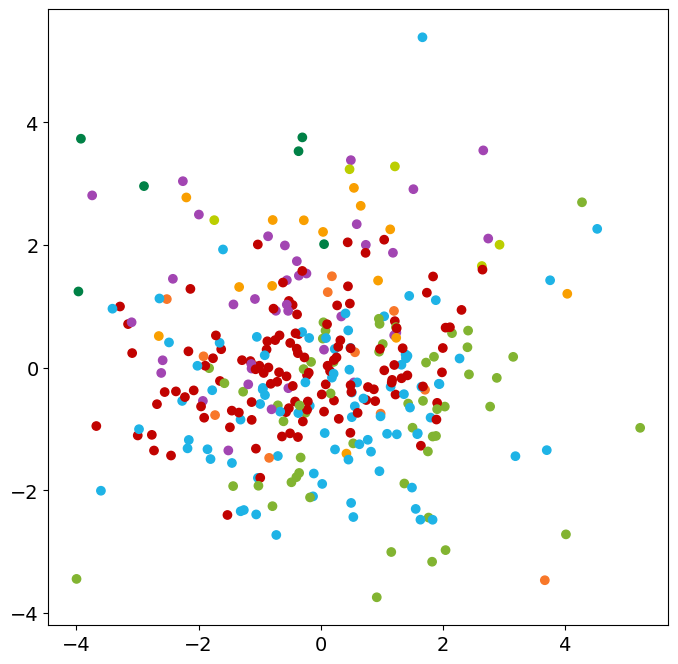

In [77]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['font.size'] = 14

plt.figure(figsize=(8, 8))
plt.scatter(reduced.dim1, reduced.dim2, c=reduced.col)
texts = []

'''
for label, x, y in zip(reduced.speaker, reduced.dim1, reduced.dim2):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', alpha=0.3),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
'''
plt.show()

In [ ]:
# Infering a vector based on some words.
vector = model0.infer_vector(
    ['gracias', 'democracia', 'derechos', 'país', 'aborto', 'feminismo'])

vector

### Training the model but for each individual intervention.

In [15]:
def intv_corpus(fname):
    for l in range(len(fname)):
        yield gensim.models.doc2vec.TaggedDocument(fname[l][1], [f'{l}'])


it_corpus = list(intv_corpus(corpus))


In [22]:
model_intv = gensim.models.doc2vec.Doc2Vec(dm=1, vector_size=200, window=10, min_count=50, workers=cores, epochs=10)
model_intv.build_vocab(it_corpus)
model_intv.train(it_corpus, total_examples=len(it_corpus), epochs=model_intv.epochs)
model_intv.save('../models/intv-partido.model')

2023-03-06 09:14:26,300 : INFO : Doc2Vec lifecycle event {'params': 'Doc2Vec(dm/m,d200,n5,w10,mc50,s0.001,t8)', 'datetime': '2023-03-06T09:14:26.300078', 'gensim': '4.1.2', 'python': '3.8.13 (default, Mar 28 2022, 06:16:26) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
2023-03-06 09:14:26,308 : INFO : collecting all words and their counts
2023-03-06 09:14:26,309 : WARNING : Each 'words' should be a list of words (usually unicode strings). First 'words' here is instead plain <class 'str'>.
2023-03-06 09:14:26,310 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2023-03-06 09:14:31,677 : INFO : collected 88 word types and 9382 unique tags from a corpus of 9382 examples and 42677461 words
2023-03-06 09:14:31,678 : INFO : Creating a fresh vocabulary
2023-03-06 09:14:31,679 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=50 retains 53 unique words (60.22727272727273%% of original 88, drops 35)', 'datetime': 

In [23]:
Z, dr = reduce_dimension(model_intv)
Z['speaker'] = df['orador']

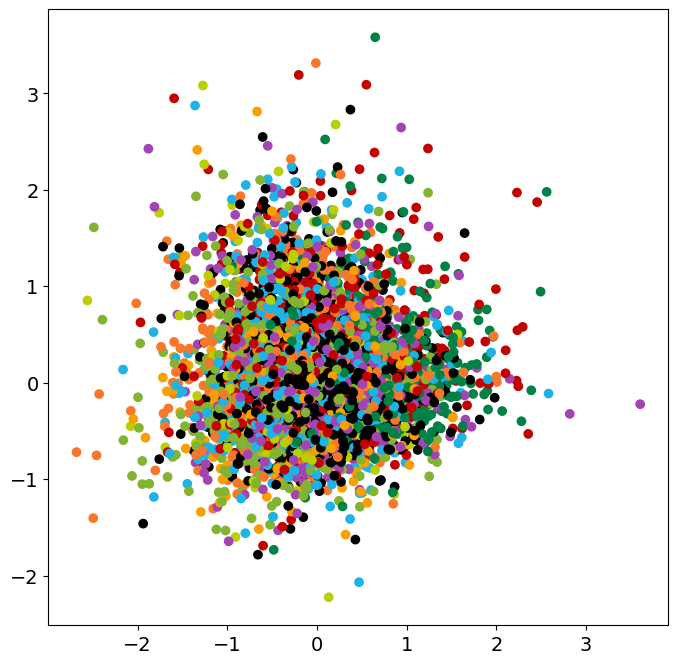

In [24]:
import matplotlib.pyplot as plt
import matplotlib as mpl


r_intv = get_color(Z)


mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['font.size'] = 14

plt.figure(figsize=(8, 8))
plt.scatter(r_intv.dim1, r_intv.dim2, c=r_intv.col)
texts = []

'''
for label, x, y in zip(reduced.speaker, reduced.dim1, reduced.dim2):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', alpha=0.3),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
'''
plt.show()
